In [6]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'
import __future__ 

In [3]:
import astropy as ap
from astropy.io import fits

### Solar Python Tutorial

Welcome to the Solar python tutorial session. In this tutorial session, we will have hands-on experience with handling solar data using python.

Solar data comes in a file format called ['FITS'](https://fits.gsfc.nasa.gov/fits_documentation.html): Flexible Image Transport System. 

This file format contains units called HDUs -- Header/Data Units. 
- The header usually contains information regarding the data acquisiton process, telescopes/filters used, etc. Header information is useful in diagnosing any problems/issues that might occur in the analyis. 
- The data unit contains the actual measurements from the telescope. This is the stuff which we shall be using for our analysis next

-------------------------------

### What's the idea?

We shall be looking at an <font color="#f34710">Active Region(AR)</font> data taken using <font color="#ed8305">Atmospheric Imaging Assembly</font> ([AIA](https://aia.lmsal.com/)) onboard <font color="#ed8305">Solar Dynamics Observatory</font> ([SDO](https://en.wikipedia.org/wiki/Solar_Dynamics_Observatory)). The AR is observed in 94 &#8491;, 131 &#8491;, 171 &#8491;, 193 &#8491;, 211 &#8491;, 335 &#8491; and 1600 &#8491;. We also have the Magnetic field data from <font color-"#8b0d7a">Helioseismic and Magnetic Imager </font>([HMI](http://hmi.stanford.edu/)). The AIA data gives us intensity values at roughly different temperatures, while the HMI data provides us with the corresponding photospheric magnetic field strength . 

------------------------------------------

### Pre-analysis

The files of your folder should be arranged as such:
```
Current Directory
    1. Wayanad_IUCAA_Tutorial
    2. assets
    3. aia171
        3.1 ssw_cutout_20110809_033012_AIA_171_.fts
        3.2 ssw_cutout_20110809_033112_AIA_171_.fts
        ....
    4. aia131 
        4.1 ....
    5. aia193
        5.1 ....
    6. aia211
        6.1 ....
    7. aia335
        7.1 ....
    8. aia094
        8.1 ....
    9. hmi
        9.1 ....
```
If this arrangement is present, we can move ahead to our first task!

### Task 0: Full Disc plotting

The Sun in its entirety, as we know, is beautiful in different wavelengths. Let us see how the Sun looks like in one particular channel

In [4]:
image=np.load('FullDisc/193.npy')
print(image.shape)

(4096L, 4096L)


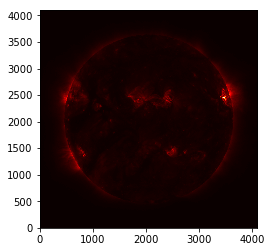

In [7]:
plt.figure()
plt.imshow(image,cmap='hot')

### Test 0: Plot a full disc image of your choice

The following wavelengths are possible: 94,171,131,193,211,304,335,1600,1700. Do not plot hmi data yet. 


In [ ]:
#Load the image.
image=np.load()
#Define the figure.
plt.figure()
#Plot the image. Use an appropriate colourmap.
plt.imshow()


### Task 1: Plotting a single AIA image

Our first step is to load a single AIA image, and plot it. For this purpose, let us take a 193 &#8491; image and plot it!

In [34]:
image_193=fits.open('aia193/ssw_cutout_20110809_033019_AIA_193_.fts')

In [35]:
'''
    We have loaded the fits file, so let us have a look at the information present in the file.
'''
print(image_193.info())

Filename: aia193/ssw_cutout_20110809_033019_AIA_193_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (703, 833)   int16   
None


One must see **one** primary HDU with 211 cards, and dimensions `(703,833)`. We will obtain this data and verify its shape.

In [36]:
image_193=image_193[0]
print(image_193.header)

SIMPLE  =                    T / Written by IDL:  Wed Dec 11 08:33:01 2019      BITPIX  =                   16 / Integer*2 (short integer)                      NAXIS   =                    2 /                                                NAXIS1  =                  703 /                                                NAXIS2  =                  833 /                                                BLD_VERS= 'V5R13   '           /                                                LVL_NUM =        1.00000000000 /                                                T_REC   = '2011-08-09T03:30:21Z' /                                              TRECSTEP=        1.00000000000 /                                                TRECEPOC= '1977.01.01_00:00:00_TAI' /                                           TRECROUN=                    1 /                                                ORIGIN  = 'SDO     '           /                                                DATE    = '2019-12-11T16:33:01' /       

In [37]:
image_data=image_193.data
print(image_data.shape)

(833L, 703L)


Now that we have confirmed the size of the image, we will need to plot it. A simple plot command is `plt.imshow` to plot the image, but this gives an observer no information. Thus, we must:
1. Figure out the extent of image in arcseconds (i.e. in physical units, which tells us where the image is taken w.r.t the centre of the solar disc.
2. Plot with the Instrument, and channel. 

All of this information is present in the fits file. The extent can be found quite simply:
1. The coordinate corresponding to the centre is given in the data, as `XCEN` and `YCEN` for the two axes. This corresponds to the middle pixel of the image --  ie. if there are `Nx` pixels in `X` dimensions, it corresponds to the `(Nx+1)/2` pixel. Similarly for `Y` axis also.
2. The step size from one pixel to the next is given. This is known as resolution of the telescope -- i.e, what is the apparent size corresponding to `1` pixel of observation ? This is obtained from `CDELT1` and `CDELT2` keywords of the header. 
3. The wavelength can be obtained from `WAVELNTH` keyword of header. Similarly, the date of observation can be obtained from `DATE-OBS`. 

Wondering how we figured out all this stuff? There is a reference file explaining the keywords at JSOC, hosted on Stanford. The document may be found [here](http://jsoc.stanford.edu/doc/keywords/AIA/AIA02840_A_AIA-SDO_FITS_Keyword_Documents.pdf): http://jsoc.stanford.edu/doc/keywords/AIA/AIA02840_A_AIA-SDO_FITS_Keyword_Documents.pdf.

------------------------

First, we will write all the codes step by step to make sure they are understandable. Then, we will proceed to wrap it all up into a function

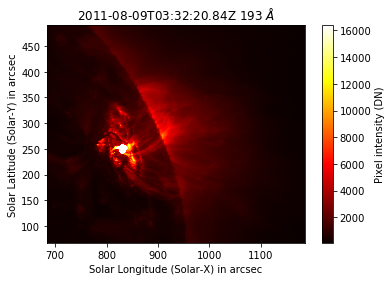

In [46]:
image_header=image_193.header
interval_x=int((image_data.shape[0]+1)/2)*image_header['CDELT1'] #half of n_elements * step size, in x axis
interval_y=int((image_data.shape[1]+1)/2)*image_header['CDELT2'] #half of n_elements * step size, in x axis
minval_x=image_header['XCEN']-interval_x #minimum value is center pixel - half the array size in arcsec, in x axis
maxval_x=image_header['XCEN']+interval_x #maximum value is center pixel + half the array size in arcsec, in x axis
minval_y=image_header['YCEN']-interval_y #minimum value is center pixel - half the array size in arcsec, in y axis
maxval_y=image_header['YCEN']+interval_y #maximum value is center pixel + half the array size in arcsec, in y axis
x_=[minval_x, maxval_x] #Extent of x, in arcsec
y_=[minval_y, maxval_y]#Extent of y, in arcsec
plt.figure()
plt.imshow(image_data,cmap='hot',origin='lower',extent=x_+y_)
plt.title("%s %d $\AA$"%(image_header['T_OBS'],image_header['WAVELNTH']))
plt.xlabel('Solar Longitude (Solar-X) in %s'%(image_header['CUNIT1']))
plt.ylabel('Solar Latitude (Solar-Y) in %s'%(image_header['CUNIT2']))
plt.colorbar(label='Pixel intensity (%s)'%(image_header['PIXLUNIT']))

---------------------------

That's it! We have plotted a wonderful image of an Active Region from the AIA data! Now, a small test :)

-------------------

### Test 1: Plot the image of the solar flare corresponding to 171 &#8491; data

Similar to the code above, plot the corresponding time image of a 171 &#8491; data. You need not `print` the header and information -- directly plot the data.

In [ ]:
#Fill up this cell! 
image_171=fits.open()



### Task 2: Subplot of two AIA images.

Now that we know how to plot a single image, we will need to learn to plot multiple images. Science is done best with as much information as possible -- thus, one needs to keep comparing and benchmarking results one obtains from different datasets. 

For a simple case, we will subplot the AIA 193 &#8491; data with a HMI Line-Of-Sight Magnetogram data!

------------------

To make our life peaceful, we define a function which automatically finds the range of field of view in arcsec. 

-------------

In [32]:
def Generate_from_center(centreval,stepsize,n_elements):
    '''
        This function give you the min and max value in arcsec of the FOV.
    '''
    interval=int((n_elements+1)/2)*stepsize
    minval=centreval-interval
    maxval=centreval+interval
    return [minval,maxval]

In [39]:
#Now, we load the 193 and HMI data.
image_193=fits.open('aia193/ssw_cutout_20110809_033219_AIA_193_.fts')
image_hmi=fits.open('hmi/ssw_cutout_20110809_033210_AIA_blos_.fts')
'''
    Note that we have selected a different datapoint here. The HMI and AIA data cannot be obtained at the same time.
    Hence, we use the data which are closest to each other.
'''
print(image_193.info())
print(image_hmi.info())

Filename: aia193/ssw_cutout_20110809_033219_AIA_193_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (703, 833)   int16   
None
Filename: hmi/ssw_cutout_20110809_033210_AIA_blos_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     106   (837, 992)   float32   
None


In [40]:
image_193=image_193[0]
image_hmi=image_hmi[0]
image_193_data=image_193.data
print(image_193_data.shape)
image_hmi_data=image_hmi.data
print(image_hmi_data.shape)
image_193_header=image_193.header
image_hmi_header=image_hmi.header

(833L, 703L)
(992L, 837L)


If you were careful, you would have noticed the HMI and AIA data do not have the same size -- why? What causes this inherent difference in the size of the two images? How can we diagnose the cause?

This will form your next test! :P

### Test 2: What causes the difference in size of the HMI and AIA data?

If we are to diagnose the cause of difference of size of the two images, where should we look up any information about the two files? And what parameter do we look at to figure this out?

In [ ]:
#Feed your analysis in here!




------------------------------
For plotting purposes, we do not need to make the images of the exact same size -- for doing science, however, we will surely need to make them of the same size! Hence, for now, we may go ahead and plot the images!

--------------------------

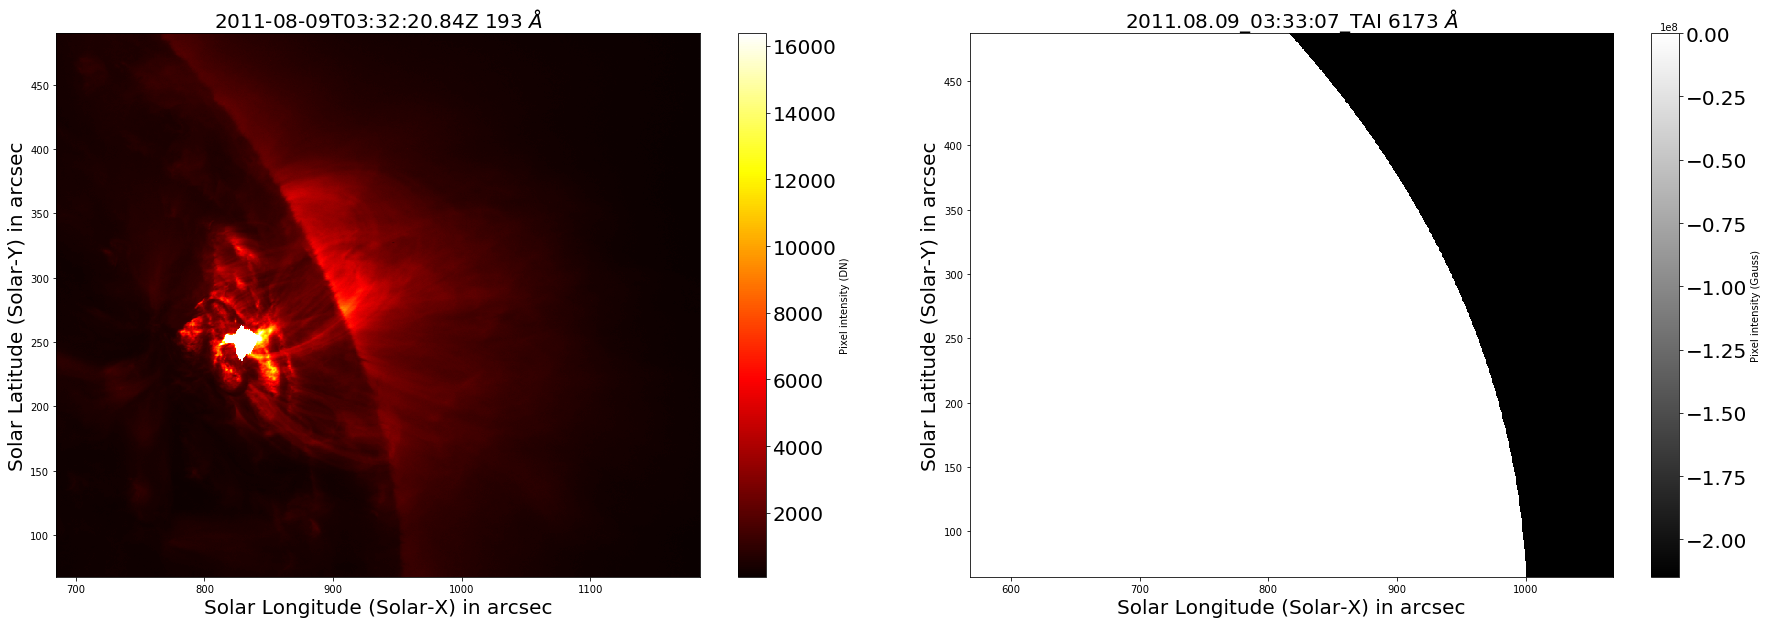

In [67]:
x_193=Generate_from_center(image_193_header['XCEN'],image_193_header['CDELT1'],image_193_data.shape[0])
y_193=Generate_from_center(image_193_header['YCEN'],image_193_header['CDELT2'],image_193_data.shape[1])
x_hmi=Generate_from_center(image_hmi_header['XCEN'],image_hmi_header['CDELT1'],image_hmi_data.shape[0])
y_hmi=Generate_from_center(image_hmi_header['YCEN'],image_hmi_header['CDELT2'],image_hmi_data.shape[1])
#Plotting them!
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
# fig corresponds to the figure variable (the total figure), 
# ax correponds to the subplot where the image is drawn.
im_193 = ax[0].imshow(image_193_data,origin='lower',extent=x_193+y_193,cmap='hot')
ax[0].set_title("%s %d $\AA$"%(image_193_header['T_OBS'],image_193_header['WAVELNTH']),fontsize=20)
ax[0].set_xlabel('Solar Longitude (Solar-X) in %s'%(image_193_header['CUNIT1']),fontsize=20)
ax[0].set_ylabel('Solar Latitude (Solar-Y) in %s'%(image_193_header['CUNIT2']),fontsize=20)
fig.colorbar(im_193,ax=ax[0],label='Pixel intensity (%s)'%(image_193_header['PIXLUNIT']),fraction=0.04).ax.tick_params(labelsize=20)
#Now we plot the hmi data
im_hmi = ax[1].imshow(image_hmi_data,origin='lower',extent=x_hmi+y_hmi,cmap='gray')
ax[1].set_title("%s %d $\AA$"%(image_hmi_header['T_OBS'],image_hmi_header['WAVELNTH']),fontsize=20)
ax[1].set_xlabel('Solar Longitude (Solar-X) in %s'%(image_hmi_header['CUNIT1']),fontsize=20)
ax[1].set_ylabel('Solar Latitude (Solar-Y) in %s'%(image_hmi_header['CUNIT2']),fontsize=20)
fig.colorbar(im_hmi,ax=ax[1],label='Pixel intensity (%s)'%(image_hmi_header['BUNIT']),fraction=0.04).ax.tick_params(labelsize=20)


#### This is bad!

The figure above looks nothing like the ones we see generally! So what is the issue? We need to check the actual values of hmi once.

In [84]:
print(np.min(image_hmi_data),np.max(image_hmi_data))
print(np.where(image_hmi_data==np.isnan(image_hmi_data)))

(-2.1474837e+08, 4551.8003)
(array([  0,   0,   0, ..., 990, 991, 991], dtype=int64), array([377, 580, 623, ..., 279,  36, 336], dtype=int64))


Aha! Seems like there are large negative values (this is from the active region), and there seem to be `NaN` values -- i.e, not a number values in the data. For better viewing, we must threshold our data appropriately!

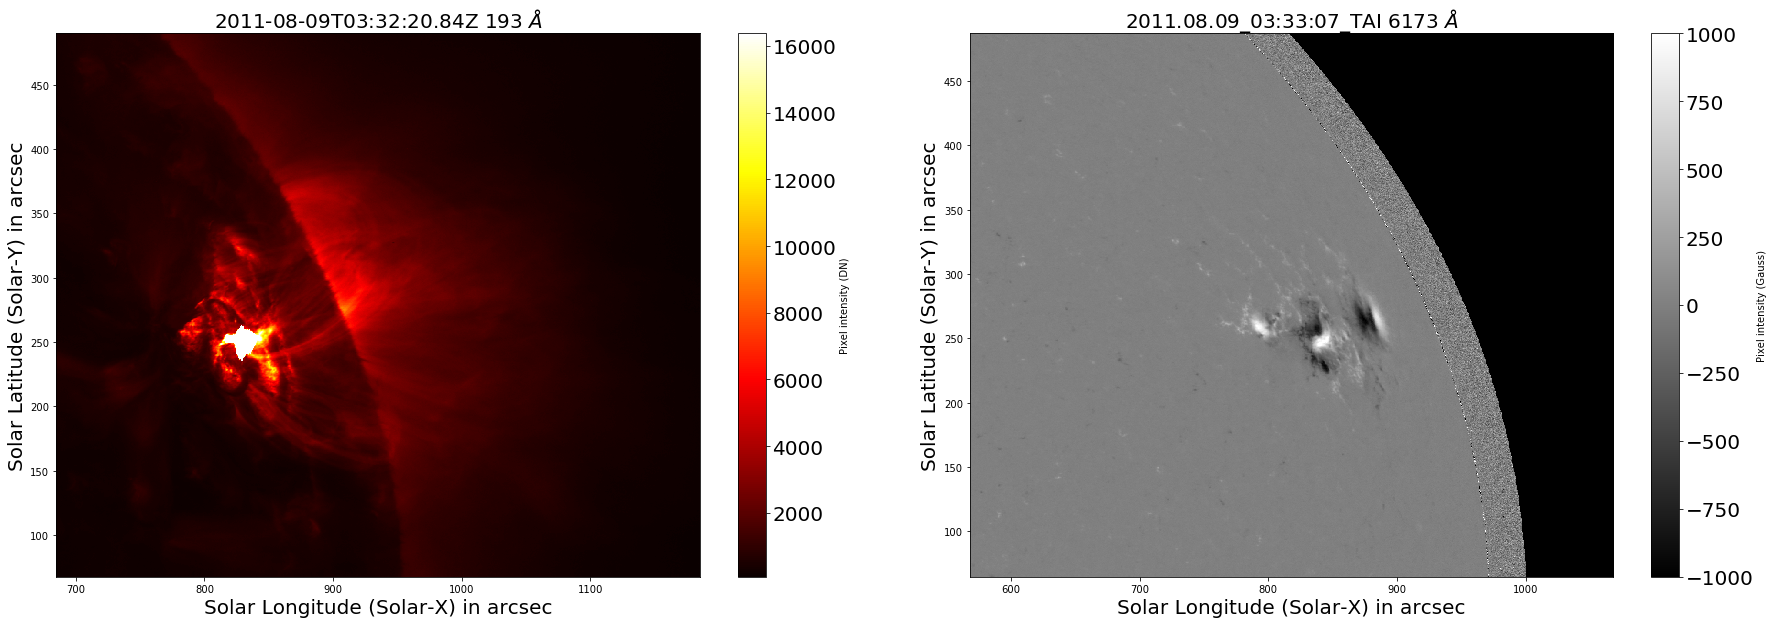

In [86]:
x_193=Generate_from_center(image_193_header['XCEN'],image_193_header['CDELT1'],image_193_data.shape[0])
y_193=Generate_from_center(image_193_header['YCEN'],image_193_header['CDELT2'],image_193_data.shape[1])
x_hmi=Generate_from_center(image_hmi_header['XCEN'],image_hmi_header['CDELT1'],image_hmi_data.shape[0])
y_hmi=Generate_from_center(image_hmi_header['YCEN'],image_hmi_header['CDELT2'],image_hmi_data.shape[1])
#Plotting them!
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
# fig corresponds to the figure variable (the total figure), 
# ax correponds to the subplot where the image is drawn.
im_193 = ax[0].imshow(image_193_data,origin='lower',extent=x_193+y_193,cmap='hot')
ax[0].set_title("%s %d $\AA$"%(image_193_header['T_OBS'],image_193_header['WAVELNTH']),fontsize=20)
ax[0].set_xlabel('Solar Longitude (Solar-X) in %s'%(image_193_header['CUNIT1']),fontsize=20)
ax[0].set_ylabel('Solar Latitude (Solar-Y) in %s'%(image_193_header['CUNIT2']),fontsize=20)
fig.colorbar(im_193,ax=ax[0],label='Pixel intensity (%s)'%(image_193_header['PIXLUNIT']),fraction=0.04).ax.tick_params(labelsize=20)
#Now we plot the hmi data
im_hmi = ax[1].imshow(image_hmi_data,origin='lower',extent=x_hmi+y_hmi,cmap='gray',clim=(-1000.0,1000.0))
ax[1].set_title("%s %d $\AA$"%(image_hmi_header['T_OBS'],image_hmi_header['WAVELNTH']),fontsize=20)
ax[1].set_xlabel('Solar Longitude (Solar-X) in %s'%(image_hmi_header['CUNIT1']),fontsize=20)
ax[1].set_ylabel('Solar Latitude (Solar-Y) in %s'%(image_hmi_header['CUNIT2']),fontsize=20)
fig.colorbar(im_hmi,ax=ax[1],label='Pixel intensity (%s)'%(image_hmi_header['BUNIT']),fraction=0.04).ax.tick_params(labelsize=20)


This looks way better! We can see how strong magnetic field regions correspond to the AR in the dataset!

### Test 3: Plot an image of 1600 &#8491; and HMI

Plot a co-temporal image of 1600 &#8491; data and a HMI B-LOS data, similar to the one we have done above. See if the above observed correpondence holds here!

In [ ]:
#Write your solution here:




--------------------------

### Task 3: Plotting all the data together in a subplot!

To make our life easier, we write a function for all the plotting, and just send in the data and axis!

In [105]:
def PlotData(image_data,image_header,ax,fig,**kwargs):
    '''
        Hold on, this looks complicated! What does it do?
        This function takes in something called a subplot axis, and plots an image in that axis alone.
        For example, if there are 4 plots arranged as a grid in a given figure, it is called a subplot. This function
    '''
    x_=Generate_from_center(image_header['XCEN'],image_header['CDELT1'],image_data.shape[0])
    y_=Generate_from_center(image_header['YCEN'],image_header['CDELT2'],image_data.shape[1])
    im = ax.imshow(image_data,origin='lower',extent=x_+y_,**kwargs)
    ax.set_title("%s %d $\AA$"%(image_header['T_OBS'],image_header['WAVELNTH']),fontsize=20)
    ax.set_xlabel('Solar Longitude (Solar-X) in %s'%(image_header['CUNIT1']),fontsize=20)
    ax.set_ylabel('Solar Latitude (Solar-Y) in %s'%(image_header['CUNIT2']),fontsize=20)
    try:
        fig.colorbar(im,ax=ax,label='Pixel intensity (%s)'%(image_header['PIXLUNIT']),fraction=0.04).ax.tick_params(labelsize=20)
    except: 
        fig.colorbar(im,ax=ax,label='Pixel intensity (%s)'%(image_header['BUNIT']),fraction=0.04).ax.tick_params(labelsize=20)

In [97]:
#Now, we load the 193 and HMI data.
image_094=fits.open('aia094/ssw_cutout_20110809_033202_AIA_94_.fts')
image_131=fits.open('aia131/ssw_cutout_20110809_033221_AIA_131_.fts')
image_171=fits.open('aia171/ssw_cutout_20110809_033212_AIA_171_.fts')
image_193=fits.open('aia193/ssw_cutout_20110809_033219_AIA_193_.fts')
image_211=fits.open('aia211/ssw_cutout_20110809_033200_AIA_211_.fts')
image_335=fits.open('aia335/ssw_cutout_20110809_033203_AIA_335_.fts')
image_1600=fits.open('aia1600/ssw_cutout_20110809_033153_AIA_1600_.fts')
image_hmi=fits.open('hmi/ssw_cutout_20110809_033210_AIA_blos_.fts')
'''
    Note that we have selected a different datapoint here. The HMI and AIA data cannot be obtained at the same time.
    Hence, we use the data which are closest to each other.
'''
print(image_094.info())
print(image_131.info())
print(image_171.info())
print(image_193.info())
print(image_211.info())
print(image_335.info())
print(image_1600.info())
print(image_hmi.info())

Filename: aia094/ssw_cutout_20110809_033202_AIA_94_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (704, 834)   int16   
None
Filename: aia131/ssw_cutout_20110809_033221_AIA_131_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (704, 833)   int16   
None
Filename: aia171/ssw_cutout_20110809_033212_AIA_171_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (705, 835)   int16   
None
Filename: aia193/ssw_cutout_20110809_033219_AIA_193_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (703, 833)   int16   
None
Filename: aia211/ssw_cutout_20110809_033200_AIA_211_.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (704, 834)   int16   
None
Filename: aia335/ssw_cutout_20110809_033203_AIA_335_.fts
No. 

In [98]:
image_094=image_094[0]
image_131=image_131[0]
image_171=image_171[0]
image_193=image_193[0]
image_211=image_211[0]
image_335=image_335[0]
image_1600=image_1600[0]
image_hmi=image_hmi[0]

image_094_data=image_094.data
image_131_data=image_131.data
image_171_data=image_171.data
image_193_data=image_193.data
image_211_data=image_211.data
image_335_data=image_335.data
image_1600_data=image_1600.data
image_hmi_data=image_hmi.data

print(image_094_data.shape)
print(image_131_data.shape)
print(image_171_data.shape)
print(image_193_data.shape)
print(image_211_data.shape)
print(image_335_data.shape)
print(image_1600_data.shape)
print(image_hmi_data.shape)

image_094_header=image_094.header
image_131_header=image_131.header
image_171_header=image_171.header
image_193_header=image_193.header
image_211_header=image_211.header
image_335_header=image_335.header
image_1600_header=image_1600.header
image_hmi_header=image_hmi.header

(834L, 704L)
(833L, 704L)
(835L, 705L)
(833L, 703L)
(834L, 704L)
(834L, 704L)
(821L, 693L)
(992L, 837L)


Great! All of the data is loaded now! Now, we will have to limit the dynamic range of HMI to enable proper plotting!

In [99]:
image_hmi_data[np.where(image_hmi_data>1000.0)]=1000.0
image_hmi_data[np.where(image_hmi_data<-1000.0)]=-1000.0

Now, we generate subplots to plot all of the data. To have individual colours, we also use different colormaps now!

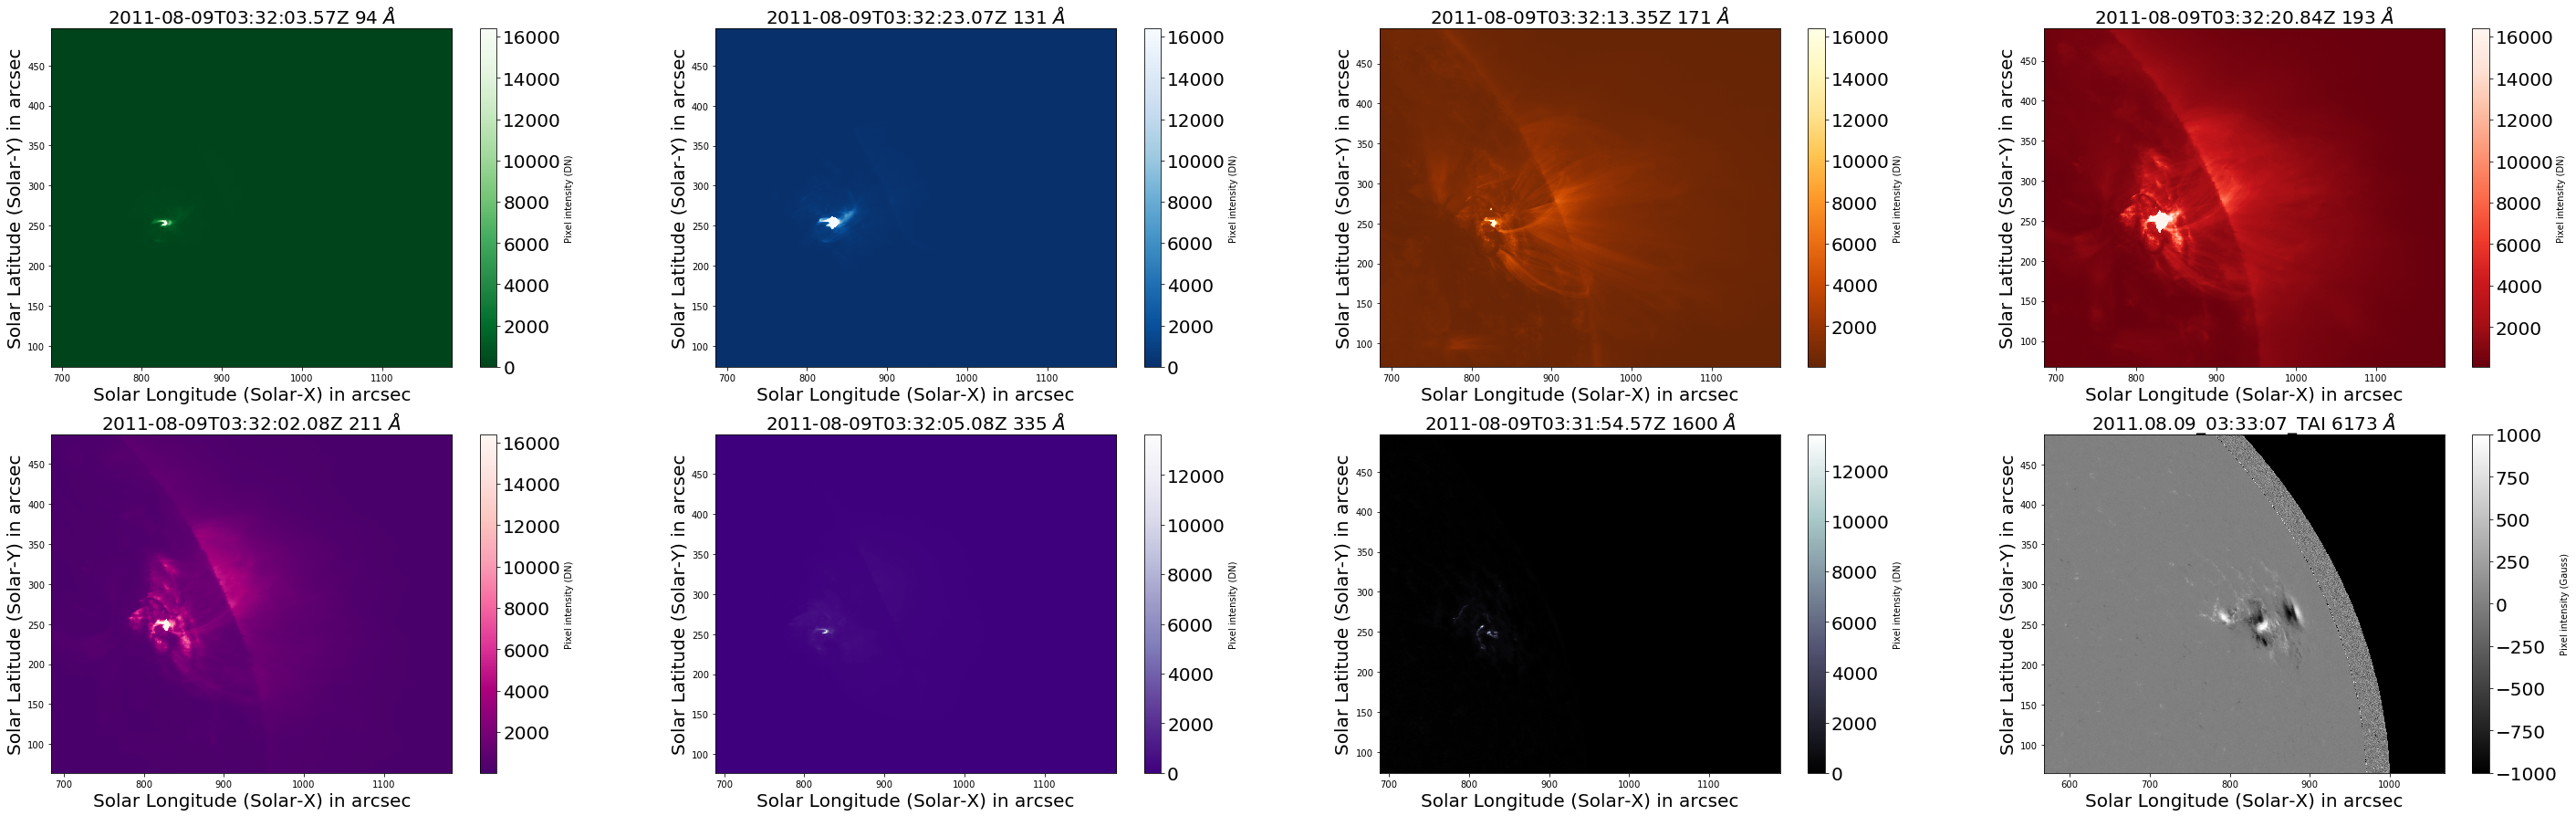

In [108]:
data_list=[image_094_data,image_131_data,image_171_data,image_193_data,
           image_211_data,image_335_data,image_1600_data,image_hmi_data]
header_list=[image_094_header,image_131_header,image_171_header,
             image_193_header,image_211_header,image_335_header,image_1600_header,
             image_hmi_header]
colormap_list=['Greens_r','Blues_r','YlOrBr_r','Reds_r','RdPu_r','Purples_r','bone','gray']
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(50,15))
axes=axes.ravel()
for d,h,c,ax in zip(data_list,header_list,colormap_list,axes):
    PlotData(d,h,ax,fig,cmap=c)

### Test 4: Subplot, but scaled

From the previous analysis, you could see that the flare is not visible well in many of the channels, due to a large dynamic range. In such cases, one performs different kinds of scaling to reduce the dynamic range:
1. Log-scaling.
2. Square root scaling.
3. Cubic scaling.

Note that due to existence of negative values (in HMI, and at some places in the AIA), the sign must be taken care of before performing the scaling. In such cases, we can define a modulus function as: $$L(x)=\frac{x}{|x|}\log(|x|),$$ $$S(x)=\frac{x}{|x|}\sqrt{|x|}.$$ These functions reduce the dynamic range while preserving the sign. 

Your task is to:
1. Perform square root scaling by calling the function `Pseud_sqrt`, and plot the images.
2. Write your function for `LogModulus` based on `Pseud_sqrt` and plot the images.

In [109]:
def Pseud_sqrt(x):
    return np.sign(x)*np.sqrt(np.abs(x))

In [111]:
#Plot the images in Square root scaling! Use the previous code, and call the function on the data alone!








In [ ]:
def LogModulus(x):
    return 

In [ ]:
#Plot the images in Log modulus scaling! Use the previous code, and call the function on the data alone!







